# Interpolating data

In [11]:
import xarray as xr
import numpy as np

## Scalar and 1-dimensional interpolation

In [12]:
da = xr.DataArray(
    np.sin(0.3 * np.arange(12).reshape(4, 3)),
    [("time", np.arange(4)), ("space", [0.1, 0.2, 0.3])],
)

In [13]:
# label lookup
da.sel(time=3)

<xarray.DataArray (space: 3)>
array([ 0.42737988,  0.14112001, -0.15774569])
Coordinates:
    time     int32 3
  * space    (space) float64 0.1 0.2 0.3

In [14]:
# interpolation
da.interp(time=2.5)

C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.


<xarray.DataArray (space: 3)>
array([0.70061376, 0.50216469, 0.25885874])
Coordinates:
  * space    (space) float64 0.1 0.2 0.3
    time     float64 2.5

interp() accepts an array-like, which gives the interpolated result as an array.

In [15]:
# label lookup
da.sel(time=[2, 3])

<xarray.DataArray (time: 2, space: 3)>
array([[ 0.97384763,  0.86320937,  0.67546318],
       [ 0.42737988,  0.14112001, -0.15774569]])
Coordinates:
  * time     (time) int32 2 3
  * space    (space) float64 0.1 0.2 0.3

In [19]:
#interpolation
da.interp(time=[2.5, 3.5])

C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.


<xarray.DataArray (time: 2, space: 3)>
array([[0.70061376, 0.50216469, 0.25885874],
       [       nan,        nan,        nan]])
Coordinates:
  * space    (space) float64 0.1 0.2 0.3
  * time     (time) float64 2.5 3.5

To interpolate data with a numpy.datetime64 coordinate you can pass a string.

In [17]:
da_dt64 = xr.DataArray(
    [1, 3], [("time", pd.date_range("1/1/2000", "1/3/2000", periods=2))]
)

In [18]:
da_dt64.interp(time=pd.date_range("1/1/2000", "1/3/2000", periods=3))

C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.


<xarray.DataArray (time: 3)>
array([1., 2., 3.])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03

The interpolated data can be merged into the original DataArray by specifying the time periods required.

## Multi-dimensional Interpolation


Like sel(), interp() accepts multiple coordinates. In this case, multidimensional interpolation is carried out.

In [22]:
da.sel(time=2, space=0.1)

<xarray.DataArray ()>
array(0.97384763)
Coordinates:
    time     int32 2
    space    float64 0.1

In [23]:
da.interp(time=2.5, space=0.15)

C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.


<xarray.DataArray ()>
array(0.60138922)
Coordinates:
    time     float64 2.5
    space    float64 0.15

Array-like coordinates are also accepted:

In [24]:
da.sel(time=[2, 3], space=[0.1, 0.2])

<xarray.DataArray (time: 2, space: 2)>
array([[0.97384763, 0.86320937],
       [0.42737988, 0.14112001]])
Coordinates:
  * time     (time) int32 2 3
  * space    (space) float64 0.1 0.2

In [25]:
da.interp(time=[1.5, 2.5], space=[0.15, 0.25])

C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.


<xarray.DataArray (time: 2, space: 2)>
array([[0.88810575, 0.86705165],
       [0.60138922, 0.38051172]])
Coordinates:
  * time     (time) float64 1.5 2.5
  * space    (space) float64 0.15 0.25

interp_like() method is a useful shortcut. This method interpolates an xarray object onto the coordinates of another xarray object. For example, if we want to compute the difference between two DataArray s (da and other) staying on slightly different coordinates,

In [27]:
other = xr.DataArray(
    np.sin(0.4 * np.arange(9).reshape(3, 3)),
    [("time", [0.9, 1.9, 2.9]), ("space", [0.15, 0.25, 0.35])],
)


it might be a good idea to first interpolate da so that it will stay on the same coordinates of other, and then subtract it. interp_like() can be used for such a case,


In [28]:
# interpolate da along other's coordinates
interpolated = da.interp_like(other)

interpolated

C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.


<xarray.DataArray (time: 3, space: 3)>
array([[0.78669071, 0.91129847,        nan],
       [0.91244395, 0.78887935,        nan],
       [0.3476778 , 0.06945207,        nan]])
Coordinates:
  * time     (time) float64 0.9 1.9 2.9
  * space    (space) float64 0.15 0.25 0.35

It is now possible to safely compute the difference other - interpolated.

In [29]:
other-interpolated

<xarray.DataArray (time: 3, space: 3)>
array([[-0.78669071, -0.52188012,         nan],
       [ 0.01959514,  0.21069425,         nan],
       [ 0.32778538,  0.26553608,         nan]])
Coordinates:
  * time     (time) float64 0.9 1.9 2.9
  * space    (space) float64 0.15 0.25 0.35

## Interpolation methods

We use scipy.interpolate.interp1d for 1-dimensional interpolation. For multi-dimensional interpolation, an attempt is first made to decompose the interpolation in a series of 1-dimensional interpolations, in which case scipy.interpolate.interp1d is used. If a decomposition cannot be made (e.g. with advanced interpolation), scipy.interpolate.interpn() is used.

The interpolation method can be specified by the optional method argument.

In [30]:
da = xr.DataArray(
    np.sin(np.linspace(0, 2 * np.pi, 10)),
    dims="x",
    coords={"x": np.linspace(0, 1, 10)},
)

C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.


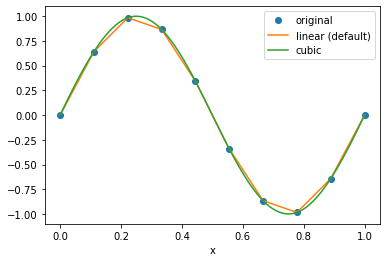

In [35]:
da.plot.line("o", label="original")
da.interp(x=np.linspace(0, 1, 100)).plot.line(label="linear (default)")
da.interp(x=np.linspace(0, 1, 100), method="cubic").plot.line(label="cubic")
plt.legend()

Additional keyword arguments can be passed to scipy’s functions.

In [39]:
# fill 0 for the outside of the original coordinates.
da.interp(x=np.linspace(-0.5, 1.5, 10), kwargs={"fill_value": 0.0})

# 1-dimensional extrapolation
da.interp(x=np.linspace(-0.5, 1.5, 10), kwargs={"fill_value": "extrapolate"})

# multi-dimensional extrapolation
da = xr.DataArray(
    np.sin(0.3 * np.arange(12).reshape(4, 3)),
    [("time", np.arange(4)), ("space", [0.1, 0.2, 0.3])],
)

da.interp(
    time=4, space=np.linspace(-0.1, 0.5, 10), kwargs={"fill_value": "extrapolate"}
)


C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing me

<xarray.DataArray (space: 10)>
array([ 0.80467509,  0.4967541 ,  0.18883312, -0.11908787, -0.42700886,
       -0.71763109, -0.99095457, -1.26427805, -1.53760153, -1.81092501])
Coordinates:
    time     int32 4
  * space    (space) float64 -0.1 -0.03333 0.03333 0.1 ... 0.3 0.3667 0.4333 0.5

## Advanced Interpolation

interp() accepts DataArray as similar to sel(), which enables us more advanced interpolation. Based on the dimension of the new coordinate passed to interp(), the dimension of the result are determined.

For example, if you want to interpolate a two dimensional array along a particular dimension, as illustrated below, you can pass two 1-dimensional DataArray s with a common dimension as new coordinate.


<img alt="interpolation" src="https://docs.xarray.dev/en/stable/_images/advanced_selection_interpolation.svg" width="350" height="250">

For example:

In [7]:
#import xarray as xr
#import numpy as np

da = xr.DataArray(
    np.sin(0.3 * np.arange(20).reshape(5, 4)),
    [("x", np.arange(5)), ("y", [0.1, 0.2, 0.3, 0.4])],
)

In [8]:
# advanced indexing
x = xr.DataArray([0, 2, 4], dims="z")

y = xr.DataArray([0.1, 0.2, 0.3], dims="z")

da.sel(x=x, y=y)

<xarray.DataArray (z: 3)>
array([ 0.        ,  0.42737988, -0.77276449])
Coordinates:
    x        (z) int32 0 2 4
    y        (z) float64 0.1 0.2 0.3
Dimensions without coordinates: z

In [10]:
# advanced interpolation, without extrapolation
x = xr.DataArray([0.5, 1.5, 2.5, 3.5], dims="z")

y = xr.DataArray([0.15, 0.25, 0.35, 0.45], dims="z")

da.interp(x=x, y=y)

C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use 

<xarray.DataArray (z: 4)>
array([ 0.55626357,  0.63496063, -0.46643289,         nan])
Coordinates:
    x        (z) float64 0.5 1.5 2.5 3.5
    y        (z) float64 0.15 0.25 0.35 0.45
Dimensions without coordinates: z

where values on the original coordinates (x, y) = ((0.5, 0.15), (1.5, 0.25), (2.5, 0.35), (3.5, 0.45)) are obtained by the 2-dimensional interpolation and mapped along a new dimension z. Since no keyword arguments are passed to the interpolation routine, no extrapolation is performed resulting in a nan value.

If you want to add a coordinate to the new dimension z, you can supply DataArray s with a coordinate. Extrapolation can be achieved by passing additional arguments to SciPy’s interpnd function,

In [12]:
x = xr.DataArray([0.5, 1.5, 2.5, 3.5], dims="z", coords={"z": ["a", "b", "c", "d"]})

y = xr.DataArray(
    [0.15, 0.25, 0.35, 0.45], dims="z", coords={"z": ["a", "b", "c", "d"]}
)

da.interp(x=x, y=y, kwargs={"fill_value": None})

C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use 

<xarray.DataArray (z: 4)>
array([ 0.55626357,  0.63496063, -0.46643289, -0.73507668])
Coordinates:
    x        (z) float64 0.5 1.5 2.5 3.5
    y        (z) float64 0.15 0.25 0.35 0.45
  * z        (z) <U1 'a' 'b' 'c' 'd'

## Interpolating arrays with NaN

Our interp() works with arrays with NaN the same way that scipy.interpolate.interp1d and scipy.interpolate.interpn do. linear and nearest methods return arrays including NaN, while other methods such as cubic or quadratic return all NaN arrays.

In [1]:
import xarray as xr
import numpy as np

In [2]:
da = xr.DataArray([0, 2, np.nan, 3, 3.25], dims="x", coords={"x": range(5)})

da.interp(x=[0.5, 1.5, 2.5])

da.interp(x=[0.5, 1.5, 2.5], method="cubic")

C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")


<xarray.DataArray (x: 3)>
array([nan, nan, nan])
Coordinates:
  * x        (x) float64 0.5 1.5 2.5

To avoid this, you can drop NaN by dropna(), and then make the interpolation

In [4]:
dropped = da.dropna("x")

dropped

<xarray.DataArray (x: 4)>
array([0.  , 2.  , 3.  , 3.25])
Coordinates:
  * x        (x) int32 0 1 3 4

In [5]:
dropped.interp(x=[0.5, 1.5, 2.5], method="cubic")

<xarray.DataArray (x: 3)>
array([1.19010417, 2.5078125 , 2.9296875 ])
Coordinates:
  * x        (x) float64 0.5 1.5 2.5

If NaNs are distributed randomly in your multidimensional array, dropping all the columns containing more than one NaNs by dropna() may lose a significant amount of information. In such a case, you can fill NaN by interpolate_na(), which is similar to pandas.Series.interpolate().

In [7]:
filled = da.interpolate_na(dim="x")

filled

<xarray.DataArray (x: 5)>
array([0.  , 2.  , 2.5 , 3.  , 3.25])
Coordinates:
  * x        (x) int32 0 1 2 3 4

This fills NaN by interpolating along the specified dimension. After filling NaNs, you can interpolate:

In [8]:
filled.interp(x=[0.5, 1.5, 2.5], method="cubic")

<xarray.DataArray (x: 3)>
array([1.30859375, 2.31640625, 2.73828125])
Coordinates:
  * x        (x) float64 0.5 1.5 2.5